In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mtpl
import matplotlib.pyplot as plt

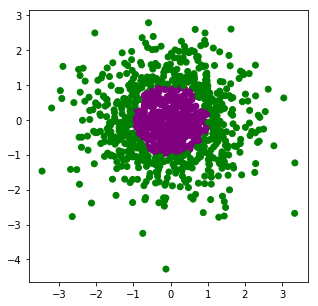

In [12]:
npuntos = 1000
mu = 0
var = 1
X1 = np.random.normal(mu, var, npuntos)
X2 = np.random.normal(mu, var, npuntos)
X = np.array([X1,X2]).reshape(npuntos,2)
Y = np.array(X1**2 + X2**2 < 1).reshape(npuntos,1)

#Plot:
fig = plt.figure(figsize=(5,5))
colors = ['green','purple']
plt.scatter(X1,X2, c=Y, cmap=mtpl.colors.ListedColormap(colors))
plt.show()

In [3]:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

In [4]:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [5]:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

In [6]:
sess.run(init)
for i in range(5000):
    sess.run(train_step, feed_dict={x: X, y_: Y})

#imprimir alguna variable
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.40066302]]
[[-0.32795271]
 [ 4.2029953 ]]


In [7]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

0.9


In [8]:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

m=((w[0]/w[2]))/((-w[0]/w[1]))
print (-1.0*w[0]/w[1], -1.0*w[0]/w[2], m)

-6.83585958065 0.533390721009 0.0780283


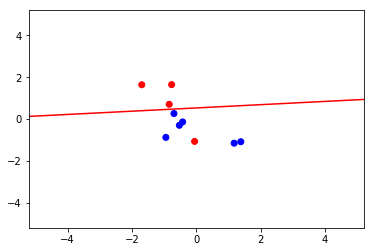

In [9]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])
plt.show()

In [10]:
sess.close()